# A Beginner Visualizing Goalkeeper Performance in the Premier League - Part 1 of 3

## 1. Data preperation

We will first import all the libaries which will be used throughout the notebook:

In [2]:
from adjustText import adjust_text #prevent text overlapping in scatter plots
import pandas as pd #to handle our data sets
import matplotlib.pyplot as plt #to visualize our data
import matplotlib.colors as mcolors #to colour the visualizations
import numpy as np #to handle operations with our dataset
%matplotlib inline

Then we read in our datasets from fbref.com using pandas.
- The first dataset is covering some basic metrics like Goals Against, # of save, saves% etc.
- The second dataset includes metrics beyond shot stopping like On Target Expected Goals, claims (crosses and actions outside the penalty area) and distribution (goal kicks, passes and throws).

In [5]:
# 1. normal stats including save%, clean sheets and penalty saves
df_stats = pd.read_csv("data/epl_gk_stats.csv", index_col="Rk")

#2. advanced stats including crosses, goal kicks and passes
df_adv_stats = pd.read_csv("data/epl_gk_adv_stats.csv", index_col="Rk")

Check if our dataset is loaded in correctly using, looking at the first 5 rows of our datasets:

In [6]:
#general information about our data set
df_adv_stats.head()

,Player,Nation,Pos,Squad,90s,GA,PKA,FK,CK,OG,...,Att.2,Launch%.1,AvgLen.1,Att.3,Stp,Stp%,#OPA,#OPA/90,AvgDist,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Adrián\Adrian,es ESP,GK,Liverpool,8.7,9,0,1,1,0,...,64,46.9,40.1,63,4,6.3,5,0.57,12.5,Matches
2,Alisson\Alisson,br BRA,GK,Liverpool,13.3,5,0,0,0,0,...,78,37.2,38.4,56,2,3.6,14,1.06,16.2,Matches
3,Kepa Arrizabalaga\Kepa-Arrizabalaga,es ESP,GK,Chelsea,23.0,30,2,0,5,2,...,145,45.5,40.1,116,7,6.0,17,0.74,16.3,Matches
4,Claudio Bravo\Claudio-Bravo,cl CHI,GK,Manchester City,3.8,7,0,0,0,0,...,28,64.3,48.2,24,1,4.2,1,0.26,12.4,Matches
5,Martin Dúbravka\Martin-Dubravka,sk SVK,GK,Newcastle Utd,23.0,34,0,0,8,1,...,216,92.1,66.5,177,14,7.9,9,0.39,12.4,Matches


### 1.1. Cleaning dataset

As we can see our dataset needs some cleaning.

Fill the empty cells, remove goalkeepers with less than 600 minutes and clean the keepers name so they only appear once.

In [7]:
#fill NaN values with average
df_stats.isnull().sum()
df_stats.fillna(df_stats.mean(), inplace=True)

In [8]:
#drop keepers with less than 600 minutes played
df_stats = df_stats.drop(df_stats[df_stats["Min"] < 600].index)

df_adv_stats = df_adv_stats.drop(df_adv_stats[df_adv_stats["90s"] < 7].index)

In [9]:
#clean player names
df_stats["Player"] = [name.split("\\")[0] for name in df_stats["Player"]]
df_adv_stats["Player"] = [name.split("\\")[0] for name in df_adv_stats["Player"]]

## 2. Data analysis 

I will cover number of Clean Sheets and Clean Sheets percentage (number of clean sheets per 90 min.)

#### Clean Sheets (#CS & CS%)

findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.


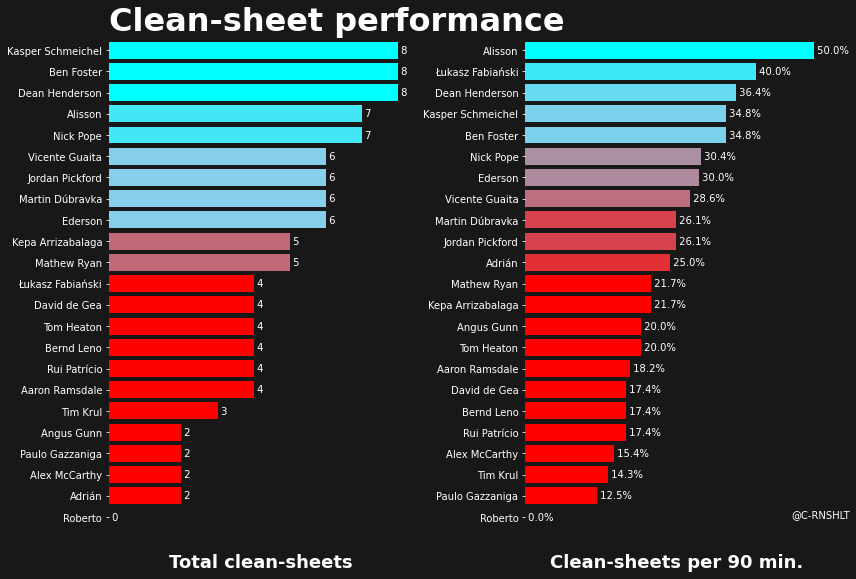

In [10]:
#sort 1st plot
x1 = df_stats.sort_values("CS")["Player"]
y1 = df_stats.sort_values("CS")["CS"]

#sort 2nd plot
x2 = df_stats.sort_values("CS%")["Player"]
y2 = df_stats.sort_values("CS%")["CS%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 8 #highest value on x-axis (ax1) 
N2 = 45 #highest value on x-axis (ax2)

#create plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

#plot 1st subplot
ax1.barh(x1, y1, color=rvb(y1/N1))

#plot 2nd subplot
ax2.barh(x2, y2,color=rvb(y2/N2))

#set background colour
fig.set_facecolor("#181818")

#add title text
fig.suptitle("Clean-sheet performance ", 
             x=0.40, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")
ax1.set_xlabel("Total clean-sheets",
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")
ax2.set_xlabel("Clean-sheets per 90 min.", 
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y1):
    ax1.text(value, i, " "+str(round(value, 2)), color="white", va="center")
for i, value in enumerate(y2):
    ax2.text(value, i, " "+str(round(value, 2))+"%", color="white", va="center")

#remove spines and xticks
ax1.set_frame_on(False)
ax1.tick_params(axis="y", colors="white")
ax1.set_xticks([])

ax2.set_frame_on(False)
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks([])

#add signature
ax2.text(xmax+45, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_(CS_CS90)_barh.png", dpi=300, facecolor="#181818");


Clean sheets is of course not a totally perfect reflecting of a goalkeepers performance, because it is heavily dependent on how the team (or defence) in front of the keeper is performing. Thus favoring keepers playing for better teams like Schmeichel and Alisson, but it is very interesting to see keepers like Dean Henderson, Nike Pope and Fabianski also performing very well in this category.

This is of course because these keepers are performing very well on an individual level, but it is also a reflecting of they teams more defensive playing style resulting in low scoring games. 

#### Saves (saves and save%)

Next I will take a look at a metric which is tied a bit more to the specific performance of an individual goalkeeper, which is number of saves and save percentage. 

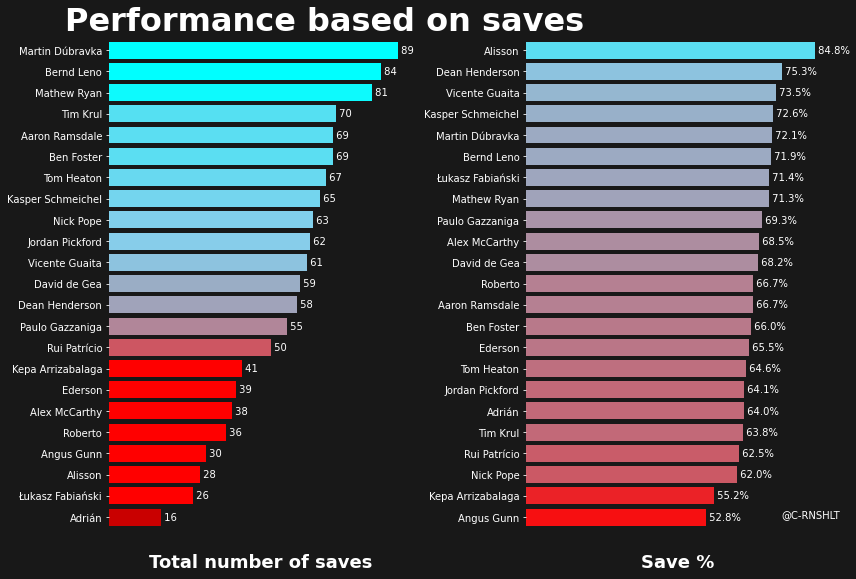

In [11]:
#sort 1st plot
x1 = df_stats.sort_values("Saves")["Player"]
y1 = df_stats.sort_values("Saves")["Saves"]

#sort 2nd plot
x2 = df_stats.sort_values("Save%")["Player"]
y2 = df_stats.sort_values("Save%")["Save%"]*100

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 83 #highest value on x-axis (ax1) 
N2 = 102 #highest value on x-axis (ax2)

#create plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

#plot 1st subplot
ax1.barh(x1, y1, color=rvb(y1/N1))

#plot 2nd subplot
ax2.barh(x2, y2, color=rvb(y2/N2))

#set background color
fig.set_facecolor("#181818")

#add text
fig.suptitle("Performance based on saves", 
             x=0.38, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")
ax1.set_xlabel("Total number of saves",
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")
ax2.set_xlabel("Save %", 
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y1):
    ax1.text(value, i, " "+str(round(value, 2)), color="white", va="center")
for i, value in enumerate(y2):
    ax2.text(value, i, " "+str(round(value, 2))+"%", color="white", va="center")

#remove spines and xticks
ax1.set_frame_on(False)
ax1.tick_params(axis="y", colors="white")
ax1.set_xticks([])

ax2.set_frame_on(False)
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks([])

#add signature
ax2.text(xmin+75, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_(#Sv_Sv%)_barh.png", dpi=300, facecolor="#181818");


Goalkeepers behind weaker defenses does an oppurtunity to make a larger number of saves, which is why we see keepers like Dubravka, Ryan and Heaton (and even Leno) on top in this metric. Wheras keepers behind better defensive teams faces a smaller number of shots and therefore have less saves. This is exemplified with Alisson and Adrian at the bottom of this metric. 

It also interesting to see how much Alisson is ahead on save percentage compared to the rest of the leagues goalkeepers. Could be because Alisson is just good when called upon or maybe the Liverpool defense puts their opponents in difficult situations when shooting, which leads to eaiser saves for Alisson.

I will also visualize the number of saves and save percentage in a scatter plot, which even more highlights how different you can measure keepers performance.

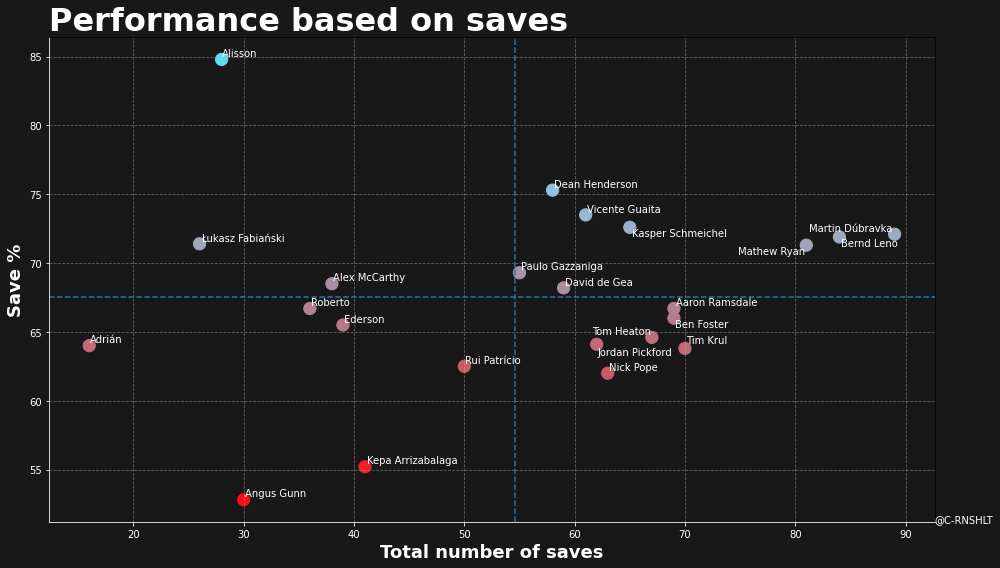

In [12]:
x = df_stats["Saves"]
y = df_stats["Save%"]*100
names = df_stats["Player"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 102 #highest value on y or x axis

#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8), facecolor="#03012d")

#set background color
fig.set_facecolor("#181818")
ax.set_facecolor("#181818")

#create our plot
plt.scatter(x, y, s=150, 
            color=rvb(y/N))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#add mean lines & grid
ax.axvline(x.mean(), linestyle='--')
ax.axhline(y.mean(), linestyle='--')
ax.grid(linestyle="--", alpha=0.5)

#adding text
ax.set_xlabel("Total number of saves", color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("Save %", fontsize=18, color="white", fontname="Corbel", fontweight="bold")
ax.set_title("Performance based on saves", color="white", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#change colour of axis and ticks
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

#Create labels for each GK
text = [ax.annotate(txt, xy = (x.iloc[i], y.iloc[i]), ha="right", color="white") 
        for i, txt in enumerate(names)]
#txt is the text added, xy is coordinates of location

#prevent overlapping text
adjust_text(text)

#add signature
ax.text(xmax, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_(#Sv_Sv%)_scatter.png", dpi=300, facecolor="#181818");

This scatter plot it is even better at visualizing how each keeper are performing. The big outliers like Alisson, Angus Gunn (the man in goal in the 0-9 game vs Leicester) and an underperforming Kepa from Chelsea.

**Saves per 90 min. and Saves per Goals Against**

I will now cover saves per 90 min. and saves per goals against, these are metrics which are not within our datatset. These metrics will therefore first be calculated and made into a new column in our datatset

In [13]:
#saves per match
df_stats["Sv/90"] = df_stats["Saves"] / (df_stats["Min"]/90)

#saves per goal
df_stats["Sv/GA"] = df_stats["Saves"] / df_stats["GA"]

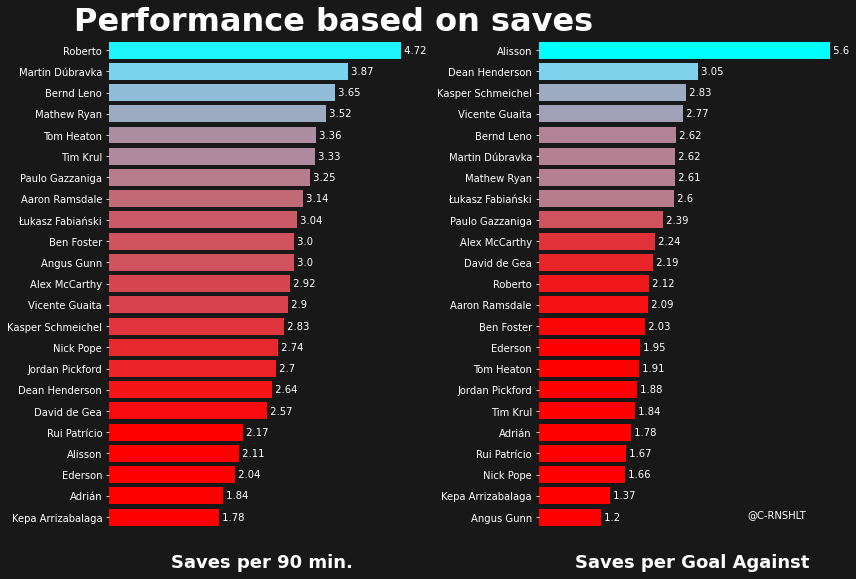

In [14]:
#sort 1st plot
x1 = df_stats.sort_values("Sv/90")["Player"]
y1 = df_stats.sort_values("Sv/90")["Sv/90"]

#sort 2nd plot
x2 = df_stats.sort_values("Sv/GA")["Player"]
y2 = df_stats.sort_values("Sv/GA")["Sv/GA"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 5 #highest value on x-axis (ax1) 
N2 = 4 #highest value on x-axis (ax2)

#create plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

#set background color
fig.set_facecolor("#181818")

#plot 1st subplot
ax1.barh(x1, y1, 
         color=rvb(y1/N1))
ax1.set_xlabel("Saves per 90 min.",
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#plot 2nd subplot
ax2.barh(x2, y2,
         color=rvb(y2/N2))
ax2.set_xlabel("Saves per Goal Against", 
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#add text
fig.suptitle("Performance based on saves", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y1):
    ax1.text(value, i, " "+str(round(value, 2)), color="white", va="center")
for i, value in enumerate(y2):
    ax2.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines and xticks
ax1.set_frame_on(False)
ax1.tick_params(axis="y", colors="white")
ax1.set_xticks([])

ax2.set_frame_on(False)
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks([])

#add signature
ax2.text(xmax+3, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_(Sv90_SvGA)_barh.png", dpi=300, facecolor="#181818");

Again we can visualize these metrics in a scatter plot. This time I have added a 3rd dimension by doing a bubble plot, where the size of the points depends on how many saves the keeper has made in total.

findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.


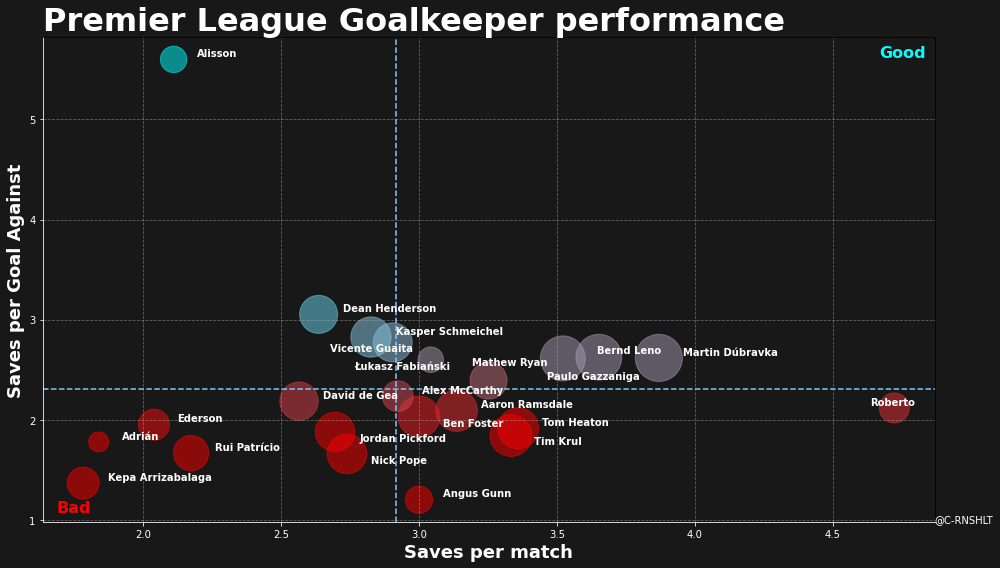

In [15]:
x = df_stats["Sv/90"]
y = df_stats["Sv/GA"]
z = df_stats["Saves"]*25
names = df_stats["Player"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 3.8 #highest value on y or x axis

#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(x, y, s=z,
            color=rvb(y/N), alpha=0.5)

#set background color
fig.set_facecolor("#181818")
ax.set_facecolor("#181818")

#add mean lines and grid
ax.axvline(x.mean(), linestyle='--', color="#82cafc")
ax.axhline(y.mean(), linestyle='--', color="#82cafc")
ax.grid(linestyle="--", alpha=0.5)

#adding text
ax.set_xlabel("Saves per match", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("Saves per Goal Against", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_title("Premier League Goalkeeper performance", 
             color="white", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#get values for plotting text
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

#shading
saves_match = np.linspace(x.min(), x.max(), 1000)
saves_GA = np.linspace(y.min(), y.max(), 1000)

#add text/grid inside plot
#bottom left
ax.text(xmin+0.05, ymin+0.1, 
        "Bad", fontsize=16, fontname="Corbel", fontweight="bold", color="red")
#top right
ax.text(xmax-0.2, ymax-0.2, 
        "Good", fontsize=16, fontname="Corbel", fontweight="bold", color="cyan")

#change colour of axis and ticks
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

#Create labels for each GK
text = [ax.annotate(txt, xy = (x.iloc[i]+0.08, y.iloc[i]), color="white", fontweight="semibold") 
        for i, txt in enumerate(names)]
                #txt is the text added, xy is coordinates of location

adjust_text(text)

#add signature
ax.text(xmax, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()
plt.savefig("output/EPL_(Sv90_SvGA)_bubble.png", dpi=300, facecolor="#181818")

Again we have Alisson as a big outlier, this time in saves per goal against.

It is though pretty interesting to see the heavily critised Roberto from West Ham on top in saves per 90 min. This could imply that he maybe didn't perform that badly, but stood behind a very bad defence and had many difficult shoots against him. This could be visualized if we look at the on target expected goal (oTxG) per shot against. This metric would highlight how difficult on average a shot would be to save for the keeper.

**oTxG per Shot on Target**

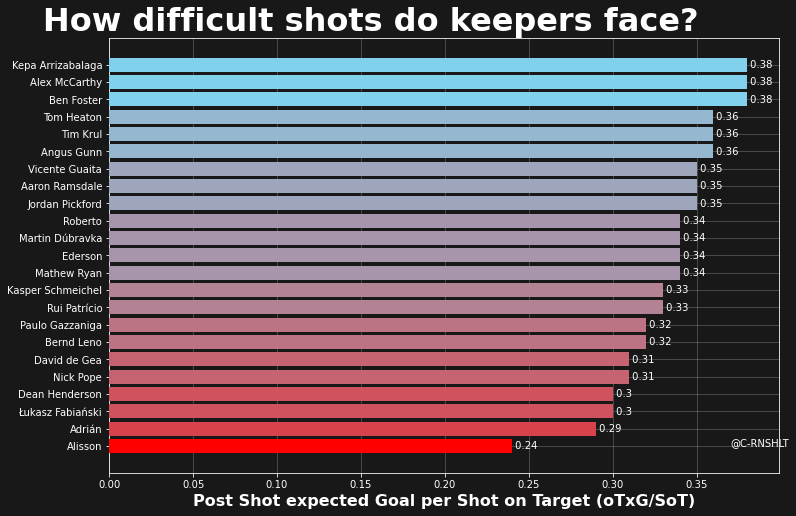

In [16]:
#sort 1st plot
x = df_adv_stats.sort_values("PSxG/SoT")["Player"]
y = df_adv_stats.sort_values("PSxG/SoT")["PSxG/SoT"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 0.5 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#181818")
ax.set_facecolor("#181818")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Post Shot expected Goal per Shot on Target (oTxG/SoT)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("How difficult shots do keepers face?", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(0.37, ymin, "@C-RNSHLT", color="white");

plt.savefig("output/EPL_(PSxG_SoT)_barh.png", dpi=300,facecolor="#181818");

We clearly see that the shots Alisson face has the leagues lowest oTxG/SoT with 0.27. This shows that the Liverpool defense makes Alisson's job a lot easier, which is reflected in his good metrics.

Roberto's oTxG/SoT is relatively high, so you could make a case that the West Ham defense has led him down and his poor performance is a reflection of that. Another interesting keeper to look at is Ederson who, in at #2 with 0.37 oTxG/SoT, generally faces more difficult shots. It is probaly a reflection of Manchester City's more offensive style of play and the more clear cut counter attacking oppoturnities which are against them. This also explains why Ederson isn't standing out when we look at saves and clean sheets.

Thank you reading along on my first little visualizing and a little analysis of goalkeeper shot stopping in the Premier League. In the next part I will, as earlier mentioned, big a little bit deeper into goalkeeper shot stopping looking even more at oTxG and cover metrics as Goals Saved Above Average (GSAA), expected- (xSv%) and adjusted save percentage (aSv%).